Liquidity Ratios:
Current Ratio: Current Assets / Current Liabilities

Quick Ratio (Acid-Test Ratio): (Current Assets - Inventory) / Current Liabilities

Cash Ratio: Cash and Cash Equivalents / Current Liabilities

Profitability Ratios:
Gross Profit Margin: (Gross Profit / Revenue) * 100

Net Profit Margin: (Net Income / Revenue) * 100

Return on Assets (ROA): (Net Income / Total Assets) * 100

Return on Equity (ROE): (Net Income / Shareholders' Equity) * 100

Solvency Ratios:

Debt-to-Equity Ratio: Total Debt / Shareholders' Equity

Debt Ratio: Total Debt / Total Assets

Interest Coverage Ratio: Earnings Before Interest and Taxes (EBIT) /
Interest Expense

Efficiency Ratios:

Inventory Turnover: Cost of Goods Sold / Average Inventory

Accounts Receivable Turnover: Revenue / Average Accounts Receivable

Accounts Payable Turnover: Purchases / Average Accounts Payable

Asset Turnover: Revenue / Average Total Assets


Market Ratios:

Price-to-Earnings Ratio (P/E Ratio): Market Price per Share / Earnings
per Share

Price-to-Sales Ratio (P/S Ratio): Market Price per Share / Revenue per
Share

Dividend Yield: Dividends per Share / Market Price per Share

In [ ]:
!pip install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
from yahooquery import Ticker
import pandas as pd
import datetime

symbols = ['ibm', 'msft','sap']
ratios_list = []

for symbol in symbols:
    ticker = Ticker(symbol)
    income_statement = ticker.income_statement('q')
    income_statement=income_statement[income_statement['periodType']=='3M']
    balance_sheet = ticker.balance_sheet('q')
    market_price_per_share = ticker.history(period='1d')['close'].iloc[-1]
    outstanding_shares = ticker.key_stats[symbol]['sharesOutstanding']
    balance_sheet = balance_sheet.reset_index(drop=True)
    income_statement = income_statement.reset_index(drop=True)

    Net_income = income_statement["NetIncome"]
    Total_revenue = income_statement["TotalRevenue"]
    Net_profit_margin = income_statement["NetIncome"] / income_statement["TotalRevenue"]
    operating_profit_margin = income_statement['EBIT'] / income_statement['TotalRevenue']
    Interest_burden = income_statement["PretaxIncome"] / income_statement["EBIT"]
    Tax_burden = income_statement["NetIncome"] / income_statement["PretaxIncome"]
    Asset_turnover = income_statement["TotalRevenue"] / balance_sheet["TotalAssets"]
    equity_multiplier = balance_sheet['TotalAssets'] / balance_sheet['StockholdersEquity']
    current_ratio = balance_sheet['CurrentAssets'] / balance_sheet['CurrentLiabilities']
    cash_ratio = balance_sheet['CashAndCashEquivalents'] / balance_sheet['CurrentLiabilities']
    debt_equity_ratio = balance_sheet['TotalDebt'] / balance_sheet['StockholdersEquity']
    debt_ratio = balance_sheet['TotalDebt'] / balance_sheet['TotalAssets']
    interest_coverage = income_statement['EBIT'] / income_statement['InterestExpense']
    total_assets = balance_sheet["TotalAssets"]
    StockholdersEquity = balance_sheet["StockholdersEquity"]
    date=balance_sheet['asOfDate']
    profit_margin = income_statement['NetIncome'] / income_statement['TotalRevenue']
    return_on_assets = income_statement['NetIncome'] / balance_sheet['TotalAssets']
    price_to_earnings = market_price_per_share / (income_statement['NetIncome'] / outstanding_shares)
    price_to_sales = market_price_per_share / (income_statement['TotalRevenue'] / outstanding_shares)
    return_on_equity=Net_profit_margin*Asset_turnover*equity_multiplier

    ratios_dict = pd.DataFrame({
        'Date':date,
        'Symbol':symbol,
        'Return on Equity':return_on_equity,
        'Total Assets': total_assets,
        'Net profit margin': Net_profit_margin,
        'Operating profit margin': operating_profit_margin,
        'Interest burden': Interest_burden,
        'Tax burden': Tax_burden,
        'Asset Turnover': Asset_turnover,
        'Equity Multiplier': equity_multiplier,
        'Current Ratio': current_ratio,
        'Cash Ratio': cash_ratio,
        'Debt To Equity Ratio': debt_equity_ratio,
        'Debt Ratio': debt_ratio,
        'Interest Coverage': interest_coverage,
        'Profit Margin': profit_margin,
        'Return on Assets': return_on_assets,
        'P/E ratio': price_to_earnings,
        'P/S ratio': price_to_sales,
        'Stockholder Equity':StockholdersEquity,
        'Net Income': Net_income,
        'Total Revenue': Total_revenue
    })


    ratios_list.append(ratios_dict)

ratios_df = pd.concat(ratios_list).set_index('Symbol')
# ratios_df.set_index('Symbol')

In [ ]:
ratios_df

In [ ]:
ratios_df["Return on Equity"].values.tolist()

In [ ]:
x = ratios_df["Net profit margin"].values.tolist()
y = ratios_df["Asset Turnover"].values.tolist()
z = ratios_df["Equity Multiplier"].values.tolist()
assets = ratios_df["Total Assets"].values.tolist()
equity = ratios_df["Stockholder Equity"].values.tolist()
income = ratios_df["Net Income"].values.tolist()
revenue = ratios_df["Total Revenue"].values.tolist()
dates = ratios_df["Date"].values.tolist()
roe = ratios_df["Return on Equity"].values.tolist()

In [ ]:
pip install openai

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Performing 3 step DU-PONT analysis: 

Net Profit Margin = (Net Income / Total Revenue)
Asset Turnover = (Total Revenue / Total Assets)
Financial Leverage = (Total Assets/Stokeholders Equity)
ROE = Net profit margin x Asset turnover x Financial Leverage

For Q2: (When compared with Q1)
ROE for IBM: UP

1) Net Profit Margin Increased
Reason:  Net Income has increased by 89.90% and Total Revenue has increased by 9.42%.
2) Asset Turnover Increased
Reason:  Total Revenue has increased by 9.42% and Total Assets have decreased by 4.33%.
3) Equity Multiplier Decreased
Reason:  Total Assets have decreased by 4.33%. and Stockholders Equity has increased by 1.88%.

ROE for Microsoft: DOWN

1) Net Profit Margin Decreased
Reason:  Net Income has increased by 0.07% and Total Revenue has increased by 5.07%.
2) Asset Turnover Decreased
Reason:  Total Revenue has increased by 5.07% and Total Assets have increased by 5.87%.
3) Equity multiplier Increased
Reason:  Total Assets have increased by 5.87%. an

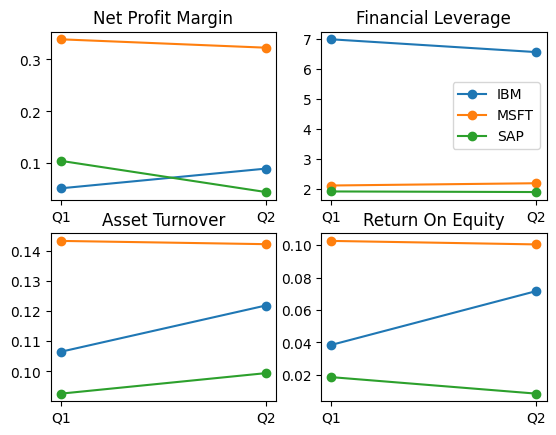

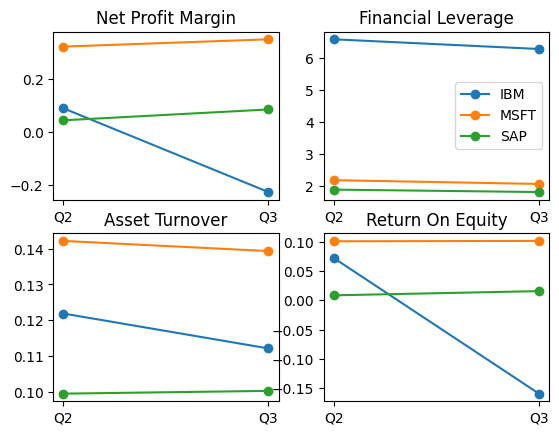

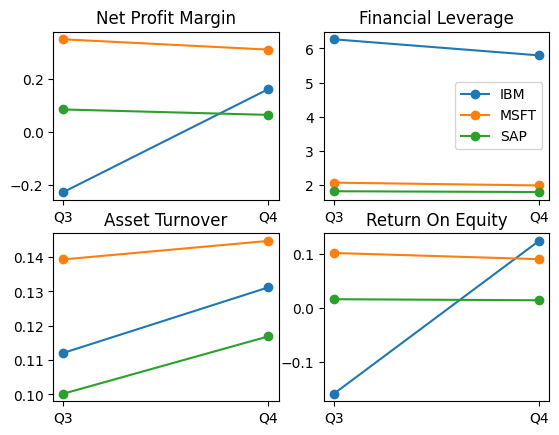

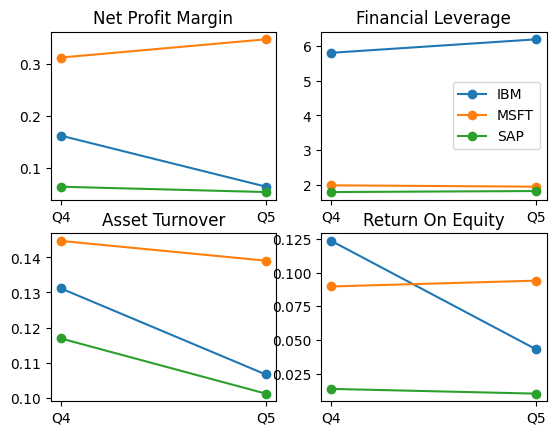

In [ ]:
roe_ibm = x[0]*y[0]*z[0]
roe_msft = x[5]*y[5]*z[5]
roe_sap = x[10]*y[10]*y[10]

print("Performing 3 step DU-PONT analysis: ")
print()
print("Net Profit Margin = (Net Income / Total Revenue)")
print("Asset Turnover = (Total Revenue / Total Assets)")
print("Financial Leverage = (Total Assets/Stokeholders Equity)")
print("ROE = Net profit margin x Asset turnover x Financial Leverage")
print()

for i in range(1,5):
  # timestamp = dates[i]
  # date = datetime.datetime.fromtimestamp(timestamp / 1e9)
  # dates = date.strftime("%Y-%m-%d")
  l=[]
  company=[]
  summary=""
  print(f"For Q{i+1}:", f"(When compared with Q{i})")

  print("ROE for IBM: ",end="")
  if roe_ibm > x[i]*y[i]*z[i]:
    print("DOWN")
    l.append(i)
    company.append("IBM")
  else:
    print("UP")
    l.append(i)
    company.append("IBM")

  print()
  income_change = abs((income[i]-income[i-1])/income[i-1])*100
  income_change = "{:,.2f}".format(income_change)

  revenue_change = abs((revenue[i]-revenue[i-1])/revenue[i-1])*100
  revenue_change = "{:,.2f}".format(revenue_change)

  asset_change = abs((assets[i]-assets[i-1])/assets[i-1])*100
  asset_change = "{:,.2f}".format(asset_change)

  equity_change = abs((equity[i]-equity[i-1])/equity[i-1])*100
  equity_change = "{:,.2f}".format(equity_change)

  message="For IBM: "
  print("1) Net Profit Margin Increased" if x[i]>x[i-1] else "1) Net Profit Margin Decreased")
  print("Reason: ",f"Net Income has increased by {income_change}%" if income[i]> income[i-1] else f"Net Income has decreased by {income_change}%" ,end=" and ")
  print(f"Total Revenue has increased by {revenue_change}%." if revenue[i]>revenue[i-1] else f"Total Revenue has decreased by {revenue_change}%.")
  message+=f"Net Income up by {income_change}%, " if income[i]> income[i-1] else f"Net Income down by {income_change}%, "
  message+=f"Total Revenue up by {revenue_change}%, " if revenue[i]>revenue[i-1] else f"Total Revenue down by {revenue_change}%, "

  print("2) Asset Turnover Increased" if y[i]>y[i-1] else "2) Asset Turnover Decreased")
  print("Reason: ",f"Total Revenue has increased by {revenue_change}%" if revenue[i]>revenue[i-1] else f"Total Revenue has decreased by {revenue_change}%" ,end=" and ")
  print(f"Total Assets have increased by {asset_change}%." if assets[i]>assets[i-1] else f"Total Assets have decreased by {asset_change}%.")
  message+=f"Total Assets up by {asset_change}%, " if assets[i+5]>assets[i+5-1] else f"Total Assets down by {asset_change}, "

  print("3) Equity multiplier Increased" if z[i]>z[i-1] else "3) Equity Multiplier Decreased")
  print("Reason: ",f"Total Assets have increased by {asset_change}%." if assets[i]>assets[i-1] else f"Total Assets have decreased by {asset_change}%." , end=" and ")
  print(f"Stockholders Equity has increased by {equity_change}%." if revenue[i]>revenue[i-1] else f"Stockholders Equity has decreased by {equity_change}%.")
  message+=f"Stockholders Equity up by {equity_change}%.\n" if assets[i+5]>assets[i+5-1] else f"Stockholders Equity down by {equity_change}%.\n"
  summary+=message

  print()
  roe_ibm = x[i]*y[i]*z[i]

  print("ROE for Microsoft: ",end="")
  if roe_msft > x[i+5]*y[i+5]*z[i+5]:
    print("DOWN")
    l.append(i+5)
    company.append("MSFT")
  else:
    print("UP")
    l.append(i+5)
    company.append("MSFT")

  print()
  income_change = abs((income[i+5]-income[i+5-1])/income[i+5-1])*100
  income_change = "{:,.2f}".format(income_change)

  revenue_change = abs((revenue[i+5]-revenue[i+5-1])/revenue[i+5-1])*100
  revenue_change = "{:,.2f}".format(revenue_change)

  asset_change = abs((assets[i+5]-assets[i+5-1])/assets[i+5-1])*100
  asset_change = "{:,.2f}".format(asset_change)

  equity_change = abs((equity[i+5]-equity[i+5-1])/equity[i+5-1])*100
  equity_change = "{:,.2f}".format(equity_change)

  message = "For MSFT: "
  print("1) Net Profit Margin Increased" if x[i+5]>x[i+5-1] else "1) Net Profit Margin Decreased")
  print("Reason: ",f"Net Income has increased by {income_change}%" if income[i+5]> income[i+5-1] else f"Net Income has decreased by {income_change}%" ,end=" and ")
  print(f"Total Revenue has increased by {revenue_change}%." if revenue[i+5]>revenue[i+5-1] else f"Total Revenue has decreased by {revenue_change}%.")
  message+=f"Net Income up by {income_change}%, " if income[i+5]> income[i+5-1] else f"Net Income down by {income_change}%, "
  message+=f"Total Revenue up by {revenue_change}%, " if revenue[i+5]>revenue[i+5-1] else f"Total Revenue down by {revenue_change}%, "

  print("2) Asset Turnover Increased" if y[i+5]>y[i+5-1] else "2) Asset Turnover Decreased")
  print("Reason: ",f"Total Revenue has increased by {revenue_change}%" if revenue[i+5]>revenue[i+5-1] else f"Total Revenue has decreased by {revenue_change}%" ,end=" and ")
  print(f"Total Assets have increased by {asset_change}%." if assets[i+5]>assets[i+5-1] else f"Total Assets have decreased by {asset_change}%.")
  message+=f"Total Assets up by {asset_change}%, " if assets[i+5]>assets[i+5-1] else f"Total Assets down by {asset_change}, "

  print("3) Equity multiplier Increased" if z[i+5]>z[i+5-1] else "3) Equity Multiplier Decreased")
  print("Reason: ",f"Total Assets have increased by {asset_change}%." if assets[i+5]>assets[i+5-1] else f"Total Assets have decreased by {asset_change}%." , end=" and ")
  print(f"Stockholders Equity has increased by {equity_change}%." if revenue[i+5]>revenue[i+5-1] else f"Stockholders Equity has decreased by {equity_change}%.")
  message+=f"Stockholders Equity up by {equity_change}%.\n" if assets[i+5]>assets[i+5-1] else f"Stockholders Equity down by {equity_change}%.\n"
  summary+=message

  print()
  roe_msft= x[i+5]*y[i+5]*z[i+5]

  print("ROE for SAP: ",end="")
  if roe_sap > x[i+10]*y[i+10]*z[i+10]:
    print("DOWN")
    l.append(i+10)
    company.append("SAP")
  else:
    print("UP")
    l.append(i+10)
    company.append("SAP")

  print()
  income_change = abs((income[i+10]-income[i+10-1])/income[i+10-1])*100
  income_change = "{:,.2f}".format(income_change)

  revenue_change = abs((revenue[i+10]-revenue[i+10-1])/revenue[i+10-1])*100
  revenue_change = "{:,.2f}".format(revenue_change)

  asset_change = abs((assets[i+10]-assets[i+10-1])/assets[i+10-1])*100
  asset_change = "{:,.2f}".format(asset_change)

  equity_change = abs((equity[i+10]-equity[i+10-1])/equity[i+10-1])*100
  equity_change = "{:,.2f}".format(equity_change)

  message="For SAP: "
  print("1) Net Profit Margin Increased" if x[i+10]>x[i+10-1] else "1) Net Profit Margin Decreased")
  print("Reason: ",f"Net Income has increased by {income_change}%" if income[i+10]> income[i+10-1] else f"Net Income has decreased by {income_change}%" ,end=" and ")
  print(f"Total Revenue has increased by {revenue_change}%." if revenue[i+10]>revenue[i+10-1] else f"Total Revenue has decreased by {revenue_change}%.")
  message+=f"Net Income up by {income_change}%, " if income[i+10]> income[i+10-1] else f"Net Income down by {income_change}%, "
  message+=f"Total Revenue up by {revenue_change}%, " if revenue[i+10]>revenue[i+10-1] else f"Total Revenue down by {revenue_change}%, "

  print("2) Asset Turnover Increased" if y[i+10]>y[i+10-1] else "2) Asset Turnover Decreased")
  print("Reason: ",f"Total Revenue has increased by {revenue_change}%" if revenue[i+10]>revenue[i+10-1] else f"Total Revenue has decreased by {revenue_change}%" ,end=" and ")
  print(f"Total Assets have increased by {asset_change}%." if assets[i+10]>assets[i+10-1] else f"Total Assets have decreased by {asset_change}%.")
  message+=f"Total Assets up by {asset_change}%, " if assets[i+10]>assets[i+10-1] else f"Total Assets down by {asset_change}, "

  print("3) Equity multiplier Increased" if z[i+10]>z[i+10-1] else "3) Equity Multiplier Decreased")
  print("Reason: ",f"Total Assets have increased by {asset_change}%." if assets[i+10]>assets[i+10-1] else f"Total Assets have decreased by {asset_change}%." , end=" and ")
  print(f"Stockholders Equity has increased by {equity_change}%." if revenue[i+10]>revenue[i+10-1] else f"Stockholders Equity has decreased by {equity_change}%.")
  message+=f"Stockholders Equity up by {equity_change}%.\n" if assets[i+10]>assets[i+10-1] else f"Stockholders Equity down by {equity_change}%.\n"

  summary+=message

  print()
  roe_sap= x[i+10]*y[i+10]*z[i+10]

  net_profit_list= []
  asset_turnover_list= []
  financial_leverage_list = []
  xaxis=[f"Q{i}",f"Q{i+1}"]
  fig, ax = plt.subplots(2, 2)
  # xaxis=["q1","q2"]
  companies=["IBM","MSFT","SAP"]
  for j in l:
    net_profit_list.append(x[j-1])
    net_profit_list.append(x[j])
    ax[0, 0].plot(xaxis, net_profit_list,marker='o') #row=0, column=0
    ax[0,0].set_title("Net Profit Margin")
    # plt.plot(xaxis,net_profit_list,marker='o',color="blue")
    # print(net_profit_list)
    asset_turnover_list.append(y[j-1])
    asset_turnover_list.append(y[j])
    ax[1, 0].plot(xaxis, asset_turnover_list,marker='o') #row=1, column=0
    ax[1,0].set_title("Asset Turnover")

    # plt.plot(xaxis,asset_turnover_list,color="green")

    financial_leverage_list.append(z[j-1])
    financial_leverage_list.append(z[j])
    ax[0, 1].plot(xaxis, financial_leverage_list,marker='o') #row=0, column=1
    ax[0,1].set_title("Financial Leverage")
    ax[0,1].legend(companies)

    # plt.plot(xaxis,financial_leverage_list, color="red")
    roe_list=[roe[j-1],roe[j]]
    ax[1,1].plot(xaxis, roe_list,marker='o')
    ax[1,1].set_title("Return On Equity")

    net_profit_list=[]
    asset_turnover_list=[]
    financial_leverage_list=[]

  # plt.legend(company)
  # # plt.yticks(np.arange(0, 5,0.1))
  # plt.show()
  print(f"Brief Summary for Q{i+1}:")
  print(summary)
  print('-'*25)


In [ ]:
ibm = ratios.transpose()
ibm

,0,1,2,3,4
Total Assets,1.332750e+11,1.275030e+11,1.258500e+11,1.272430e+11,1.336370e+11
Net profit margin,5.162699e-02,8.959835e-02,-2.265542e-01,1.623630e-01,6.504350e-02
Operating profit margin,6.578391e-02,1.299562e-01,-2.981499e-01,2.171829e-01,9.998597e-02
Interest burden,6.670236e-01,8.528975e-01,1.070138e+00,9.136552e-01,7.424561e-01
Tax burden,1.176565e+00,8.083624e-01,7.100644e-01,8.182367e-01,8.761815e-01
Asset Turnover,1.065316e-01,1.218481e-01,1.120938e-01,1.311742e-01,1.066471e-01
Current Ratio,9.199554e-01,8.760206e-01,9.518480e-01,9.242342e-01,1.160972e+00
Quick Ratio,8.678060e-01,8.231378e-01,8.929626e-01,8.749722e-01,1.109250e+00
Cash Ratio,2.916960e-01,2.208893e-01,2.565483e-01,2.503095e-01,3.012616e-01
Debt To Equity Ratio,3.020840e+00,2.750013e+00,2.681112e+00,2.461402e+00,2.854842e+00


In [ ]:
ratios['P/S ratio'].tolist()

[8.243267957786541,
 7.533336667395297,
 8.2964427918518,
 7.012037533080901,
 8.212034694404528]

In [ ]:
import quandl

In [ ]:
quandl.ApiConfig.api_key = 'j_sfVspAFLrozbw1LYm9'
